## ChatGPT

O ChatGPT é, antes de tudo, um GPT - _Generative Pre-trained Transformer_. Generative pois produz novos textos a partir de um prompt, pre-trained devido à etapa de treino em um dataset gigantesco (~45 terabytes) com possibilidade de treino subsequente para ajuste fino, e transformer pois essa é a arquitetura de sua rede neural.

As redes _transformers_ são talvez a ferramenta mais importante no pico atual de interesse em inteligência artificial. Publicado em 2017, o artigo _"Attention Is All You Need"_, do _Google Research_, codifica o _mecanismo de atenção_, capaz de capturar e propagar a **ordem** e o **contexto** das palavras. Esse mecanismo é o responsável pela desambiguação de palavras com múltiplos significados diferentes.

A playlist de redes neurais do canal 3blue1brown culmina com um par de vídeos (~53 minutos total) explicando com animações o funcionamento dos GPTs e do mecanismo de atenção: https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi


<br>

##### Prevendo a próxima palavra

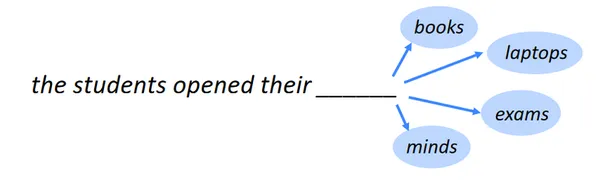

O núcleo do funcionamento do ChatGPT é a previsão da próxima palavra (token) na sentença - inclusive, podemos ver isso em ação ao interagir com a ferramenta e observar a resposta chegando uma palavra por vez. Para esse objetivo, as palavras da sentença são codificadas em um _embedding_ de 12.288 dimensões (GPT 3) com um dicionário de 50.257 tokens únicos. A sequência de vetores é "propagada" pela rede neural alternando entre camadas de perceptrons multilayer e mecanismos de atenção. Esse processo é realizado com a sentença completa ao mesmo tempo e o embedding da última palavra é usado para fazer a previsão da próxima palavra. O processo pode ser subsequentemente repetido para a geração das próximas palavras e por fim o texto completo.


##### Mecanismo de atenção

O mecanismo de atenção é a parte principal da arquitetura _transformer_, e é responsável pela contextualização dos vetores de embedding das palavras. São camadas complexas que aplicam uma transformação nos embeddings e o resultado é um embedding mais específico, se referindo àquela palavra naquele contexto. Por exemplo, com a palavra `modelo`:

<br>
<font size="4">  
<center>Na passarela caminha o modelo.</center>
<center>Com redes neurais treinamos um modelo.</center>
</font>
<br>

No primeiro caso, o mecanismo de atenção é o responsável por incorporar o contexto semântico referente às palavras "passarela" e "caminha" na palavra "modelo", especificando que se trata de um modelo artístico ou comercial em um desfile de moda.

No segundo caso, "redes", "neurais" e "treinamos" contextualizam que se trata de um modelo de machine learning. É importante notar que isto acontece com os outros tokens também simultaneamente, como no caso de "redes" contextualizada por "neurais" para especificar de que tipo de rede estamos falando.


##### Softmax e temperatura

Na saída do ChatGPT é utilizada uma função chamada _softmax_, muito prevalente em redes neurais no geral. Essa função tem como objetivo transformar um vetor de números arbitrários em uma distribuição de probabilidade, e próximo token predito da sentença será amostrado dessa distribuição.

<br>
$${\large \sigma (\mathbf {z} )_{i}={\frac {e^{z_{i}}}{\sum _{j=1}^{K}e^{z_{j}}}}}$$

Os termos $z_{i}$ podem ser divididos por uma constante para "nivelar" a distribuição de probabilidade - constantes maiores aproximam da distribuição uniforme, e $0$ produz uma saída com $1$ no maior valor e $0$ nos demais, efetivamente transformando a _softmax_ em somente _max_. Com essa constante introduzida, a função fica semelhante a algumas equações da termodinâmica onde essa constante representa a temperatura, o que motivou os pesquisadores a se referirem a essa constante como _temperatura_. Na prática, a temperatura é muito análoga a uma espécie de "criatividade" do modelo, e quando aumentada faz com que a saída seja menos previsível e confiável.


##### Treino em etapas

No caso do ChatGPT, estamos interessados em um modelo que _responde perguntas_. Para isso, é necessário uma etapa de treino _supervisionado_ com perguntas/instruções e respostas escritas por humanos **após** a etapa de pré-treino, onde aprendemos a prever a próxima palavra na sentença.

Uma vez terminada esta etapa supervisionada, o modelo pode produzir diversas respostas diferentes para o mesmo prompt devido à natureza probabilística da _softmax_. Mas como determinar qual é a melhor resposta? A técnica escolhida para essa etapa foi o _Reinforcement Learning with Human Feedback_ (https://huggingface.co/blog/rlhf), que consiste em um modelo de recompensa (aprendizado por reforço) treinado com rankings produzidos por humanos:

<!-- <br>
<div>
    <center>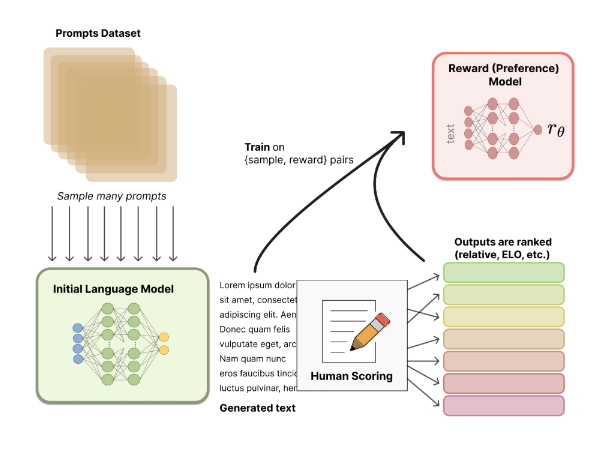</center>
</div>
<br> -->
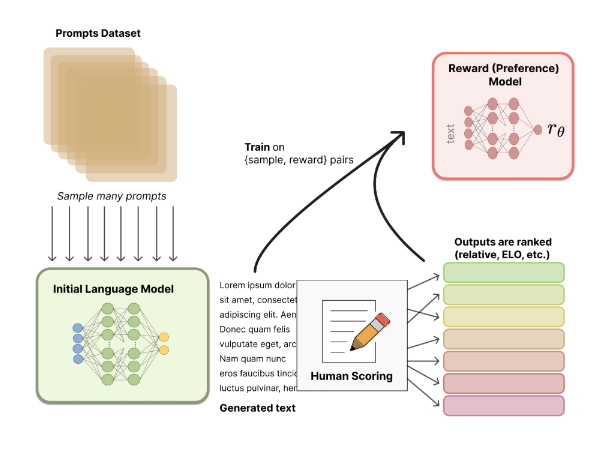

Após essa etapa, outra técnica rebuscada de aprendizado por reforço (2017, https://en.wikipedia.org/wiki/Proximal_policy_optimization) é utilizada para mais um ajuste fino no modelo, trazendo a habilidade de incoroporar mudanças na política de recompensa.

O produto final é um modelo capaz de responder a _prompts_, seguindo instruções em linguagem natural e nos devolvendo o resultado também em linguagem natural.

É importante notar que apesar da tecnologia e arquitetura dos _transformers_ ser utilizada em praticamente todos os modelos generativos atuais, detalhes da implementação e etapas de ajuste podem divergir muito entre as aplicações. Os _transformers_ também são utilizados em modelos generativos de imagens e áudios, por exemplo.

## Redes Neurais

Esse é o tópico quente do momento, com o surgimentos dos LLMs (_Large Language Models_), modelos generativos e _deepfakes_. As redes neurais são ferramentas importantíssimas para a inteligência artificial e atualmente são utilizadas em praticamente todos os escopos possíveis, além de possibilitarem a construção de algoritmos extremamente complexos e resbucados como o mecanismo de atenção. Mas por quê?

Em primeiro lugar, precisamos nos lembrar do que queremos de uma rede neural: aproximar uma função. Nesse contexto, existe uma série de resultados matemáticos que garantem que, basicamente, _qualquer função_ pode ser aproximada por uma rede neural _em qualquer grau de precisão_ - ou seja, as redes neurais realmente **podem** resolver qualquer problema!

Entretanto, há um outro lado desses teoremas: por mais que seja _possível_, na maioria das vezes não será _factível_ devido à quantidade gigantesca de neurônios e camadas necessárias na rede para atingir o objetivo. Porém, as redes neurais têm outra carta na manga: a flexibilidade! Podemos construí-las de várias formas diferentes, comumente chamadas de arquiteturas, para atingir objetivos diferentes. Por exemplo, para problemas de imagens, como visão computacional, normalmente utiliza-se redes neurais _convolucionais_ para capturar contornos na imagem e formatos de objetos.

É importante ressaltar também que os avanços de manufatura de semicondutores possibilitaram a construção de modelos gigantescos como os GPTs, que necessitam treinar e manter simultaneamente _bilhões_ de parâmetros. Em específico, os núcleos de processamento paralelo desenvolvidos para GPUs realizam as operações matriciais/tensoriais necessárias para o treinamento das redes neurais de forma extremamente eficiente, o que significa que podemos (e devemos!) treinar as redes neurais em placas de vídeo. Nesse ponto é necessário ressaltar também que a maior parte da _stack_ de tecnologia construída que existe hoje depende do CUDA, o que na prática significa que é necessário uma GPU da NVidia para executar os modelos. Porém, também podem ser executados na CPU, mas com um tempo de execução muito maior.

Playlist recomendada: Neural Networks/Deep Learning, do StatQuest (https://www.youtube.com/watch?v=zxagGtF9MeU&list=PLblh5JKOoLUIxGDQs4LFFD--41Vzf-ME1)

#### Estrutura

As redes neurais artificiais foram modeladas inicialmente em 1943 e fortemente inspiradas pela propagação da informação em cérebros biológicos. Elas consistem de uma camada de entrada, uma ou várias sequências de operações (camadas ocultas) e uma camada de saída, em uma estrutura extremamente similar a um grafo.

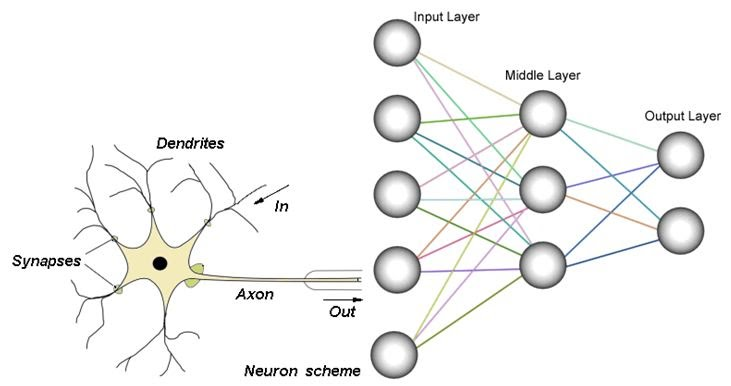

Cada vértice do grafo é chamado de _neurônio_, e as arestas conectando os neurônios representam _pesos_ (_weights_). O valor de um neurônio na segunda camada é computado como a soma ponderada dos neurônios anteriores conectados.

Se construirmos uma rede neural somente com essas definições, nosso modelo seria linear: temos coeficientes (pesos) multiplicando variáveis (neurônios), formando uma _combinação linear_. Porém, os problemas mais difíceis são exatamente os não-lineares! Para introduzir comportamentos não-lineares na rede neural, precisamos de uma _função de ativação_, que é aplicada a cada neurônio e muda o comportamento da rede. Duas funções de ativação muito comumente utilizadas são a sigmoide (a mesma da regressão logística) e a ReLU (_Rectified Linear Unit_):

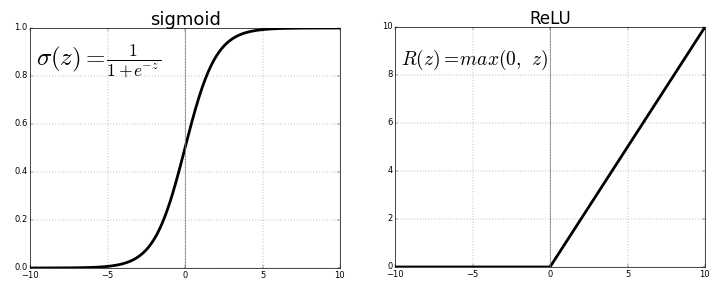

#### Perceptron

O perceptron é o "tijolo de construção" das redes neurais - um único neurônio, uma única combinação linear das variáveis, uma única função de ativação não-linear:

<!-- <div>
    <center>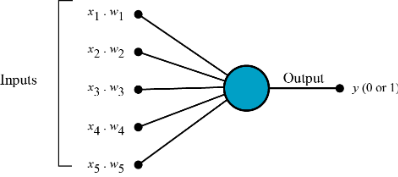</center>
</div> -->
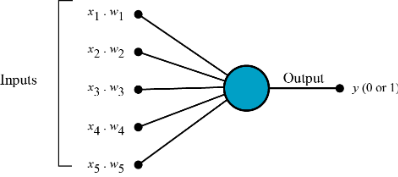

Que também pode ser representado pela função

$${\large f(\mathbf {x} )=\theta (\mathbf {w} \cdot \mathbf {x} +b)}$$

onde $\mathbf{w}$ é o vetor de pesos (arestas), $\mathbf{x}$ é o vetor de variáveis de entrada e $b$ é o vetor de viés (termo livre da regressão linear). $\theta$ neste caso representa a função de ativação de passo unitário: $\theta(x) = 1$ se $x\geq0$, e $0$ caso contrário:

<!-- <br>

<div>
    <center><img src="attachment:image-3.png" width="400"></center>
</div> -->
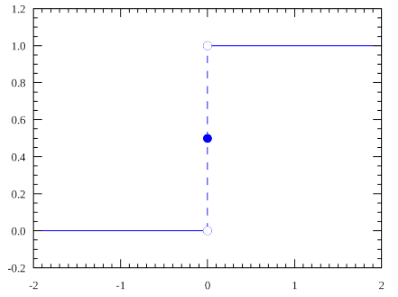

Note que os pesos $\mathbf{w}$ e vieses $\mathbf{b}$ são "fixos", e $\mathbf{x}$ são nossas variáveis. Dessa forma, podemos definir uma função de custo (como entropia cruzada binária para classificação ou erro quadrático médio para regressão) e **calcular o gradiente em respeito aos pesos e vieses**.

Dessa forma, esse gradiente nos dará uma **direção de máximo aumento** da função de **custo** no epaço dos **parâmetros** do modelo. Portanto, podemos minimizar o erro dando passos na direção **oposta** do gradiente da função de custo, o que é efetivamente o processo de aprendizado das redes neurais. Essa técnica é comumente chamada de _gradient descent_ (descida de gradiente) e possui várias variações.

#### Multilayer Perceptron

Como o próprio nome diz, o _multilayer perceptron_ nada mais é do que uma sequência de perceptrons encadeados formando "camadas". Essa é a arquitetura mais genérica de redes neurais e é aplicável em uma gama enorme de escopos diferentes. Também é chamada de _fully connected feed-forward_.

<!-- <br>
<div>
    <center>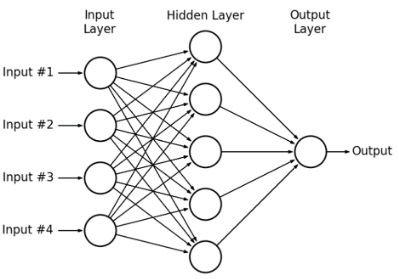</center>
</div> -->
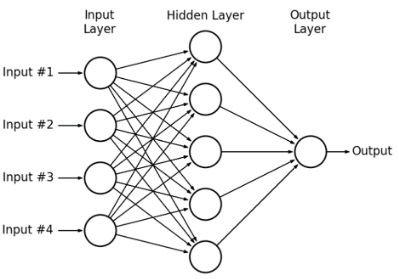

O funcionamento é idêntico ao _perceptron_, porém com mais neurônios (camadas ocultas/_hidden layers_) e consequentemente mais pesos/arestas. Os multilayer perceptrons normalmente são escalados aumentando a quantidade de neurônios em cada hidden layer ou aumentando e/ou a quantidade de hidden layers, o que garante um forte poder preditivo à técnica.

É importante notar que a quantidade de dados necessária para ajustar um multilayer perceptron aumenta conforme sua complexidade (tamanho e quantidade de hidden layers) aumenta, o que pode tornar infactível a utilização devido a requerimentos de memória.

#### Backpropagation

Nos MLPs, teremos aplicações de funções _encadeadas_ (ou aninhadas), o que dificulta o cálculo do gradiente. Porém, existe uma propriedade matemática dessa construção chamada _regra da cadeia_, rotineiramente ensinada em aulas iniciais de cálculo, que nos permite calcular derivadas de composições de funções como uma soma e produto de derivadas.

Na prática, isso significa que nas redes neurais, podemos calcular o gradiente da última camada em função das demais e usá-lo para atualizar os pesos da última camada, e em seguida repetir o mesmo com a penúltima camada, até chegarmos na primeira. O que efetivamente está acontecendo é a propagação do gradiente através da rede, "distribuindo" os ajustes em cada parâmetro conforme é calculado. Devido à essa natureza "de trás pra frente", essa técnica é chamada de _backpropagation_ e define como as redes neurais constroem e codificam o conhecimento aprendido.

A descida de gradiente dessa etapa é controlada principalmente por um parâmetro chamado _taxa de aprendizagem_ (_learning rate_, ou _lr_) e o ajuste incorreto desse parâmetro pode impossibilitar o aprendizado, sendo necessário experimentação com diferentes _learning rates_.

#### Ativação da última camada

Entre todas as funções de ativação de uma rede neural, as da última camada são talvez as mais importantes - são elas quem controlam diretamente a saída do modelo! Podemos escolher entre várias opções, mas a característica do problema é o fator determinante na escolha: estamos fazendo uma regressão ou uma classificação? No caso de uma classificação, as classes são exclusivas?

Ao utilizar uma função de ativação como a ReLU na saída da rede, os valores preditos terão valor mínimo $0$ e não terão valor máximo, pois a ReLU não é limitada superiormente. Dessa forma, essa função de ativação é bem aplicada em problemas de regressão onde valores negativos não são possíveis, como estimar volume de vendas futuras.

Por outro lado, caso escolhêssemos a _softmax_, teríamos uma distribuição de probabilidades na saída da rede - perfeito para problemas de classificação exclusivos.

## Exercícios
Os exercícios da aula de hoje são conceituais e não envolvem códigos.
- Qual a diferença de um GPT para o ChatGPT?
- Como um GPT entende que uma palavra pode ter mais de um significado?
- O que é a temperatura em _large language models_?
- Por quê redes neurais são tão prevalentes?
- Que tipos de problemas podemos resolver com redes neurais?
- Elenque as principais funções de ativação usadas em redes neurais.